# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0382 Гудов Никита. Вариант №28

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения


Группа - совокупность всех акторов, связи между которыми должны быть изучены.

Подгруппа - любое подмножество акторов и все связи между ними.

Сплочённая подгруппа - множество акторов, которые соеденены между собой посредством многочисленных сильных и прямых связей.

Клика - Максимальный полный подграф из трёх и более элементов.

n-клика - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n. (Путь может проходить по узлам вне подграфа).

n-клан - n-клика, в которой геодезическое расстояние между любыми двумя узлами не превышает n для путей внутри подграфа. (Путь не может проходить по узлам вне подграфа).

n-клуб - максимальный подграф диаметра $d\le n$.

k-ядро - максимальный подграф, в котором каждая вершина связана минимум с k другими вершинами этого же подграфа.

k-плекс - максимальный подграф содержащий $g_s$ узлов, в котором каждый узел смежен не менее чем с ($g_s-k$) узлами подграфа.

Виды связности подгрупп:

слабо n-связные - соединены полупутём не больше n (полупуть - неориентированный путь).
односторонне n-связные - $\exists$ путь из i в j или из j в i не больше n.
сильно n-связные - $\exists$ путь из i в j и из j в i не больше n; дуги могут различаться.
рекурсивно n-связные - $\exists$ путь из i в j и из j в i не больше n; пути должны включать одни узлы и дуги.
Модулярность - характеристика структуры сети, в частности степень кластеризации узлов, когда внутри кластера наблюдается много связей (высокая плотность), а между кластерами мало связей (низка плотность) - разность между долей связей внутри группы и ожидаемой долей связей, если бы связи были размещены случайно ($\in [-\frac12;1]$).

Сеть аффилированности - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определённом событии. Сеть состоит из двух измерений: множества акторов $\mathcal{N}=\{n_1...n_g\}$ и множества событий $\mathcal{M}=\{m_1...m_h\}$

Представление сетей аффилированности:

Матрица инцидентности $A_{g\times h}$
Двудольный граф
Прелставление биграфа в виде социоматрицы размера $(g+h)\times (g+h)$ и вида $(^{0_g A}_{A^T 0_h})$
Гиперграф ($\mathcal{H}=\mathcal{H}(\mathcal{A}, \mathcal{B})$, где $\mathcal{A}$ - множество объектов, $\mathcal{B}$ - множество событий)
Двойственный гиперграф

Степень участия - количество событий, с которыми связан каждый актор: $a_{i+} = \sum_{j=1}^h a_{ij} = x_{ii}^\mathcal{N}$

Средняя степень участия - $\bar{a_{i+}} = \frac1g \sum_{i=1}^g x_{ii}^\mathcal{N}$

Размер события - $a_{+j} = \sum_{i=1}^g a_{ij} = x_{jj}^\mathcal{M}$

Средний размер события = $\bar{a_{+j}} = \frac1h \sum_{j=1}^h x_{jj}^\mathcal{M}$

Связная сеть аффилированности - аффилированная сеть, в которой все пары узлов достижимы.

Диаметр аффилированной сети - длина самого длинного пути между любой парой актор и/или событий.

Клика уровня c в взвешенном графе - максимальный полный подграф из ьрёх и более узлов, все из которых являются смежными на уровне c (медлу всеми парами узлов есть рёбра со значениями $\ge c$).

Клика уровня c для отношений соучастия - подграф, где все пары акторов совметсно участвуют не менее чем в c событиях.

Клика уровня c для отношений перекрытия - подграф, где все пары событий имеет не менее c общих членов.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [128]:
## Код для выполнения пункта работы
## Не забывайте добавлять комментарии для удобства проверки преподавателем

In [2]:
install.packages("statnet")
install.packages("igraph")
install.packages("sna")

пакет 'statnet' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	D:\Temp\RtmpeubJhP\downloaded_packages
пакет 'igraph' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	D:\Temp\RtmpeubJhP\downloaded_packages
пакет 'sna' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	D:\Temp\RtmpeubJhP\downloaded_packages
пакет 'HyperG' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	D:\Temp\RtmpeubJhP\downloaded_packages


##### 1. Из файла florentine_marital.csv извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

In [100]:
library(statnet)
library(igraph)
library(sna)

In [101]:
object <- read.csv("./florentine_marital.csv", comment.char = '#', sep = ',')
matrix <- as.matrix(object)

In [102]:
net <- graph_from_adjacency_matrix(matrix , mode='undirected')
rownames(matrix) <- colnames(matrix)

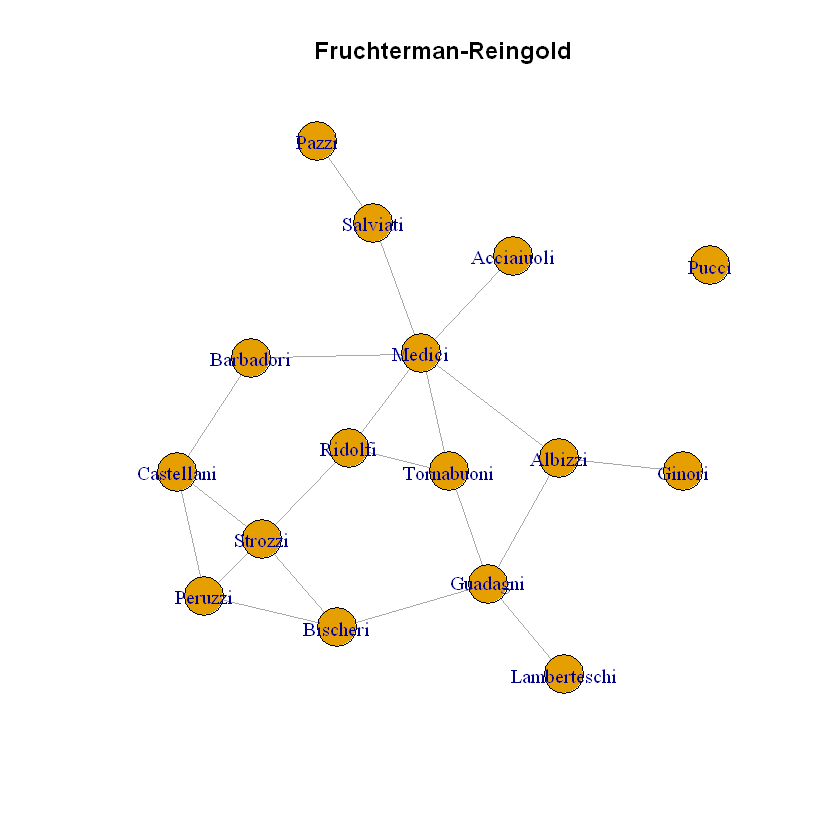

In [103]:
plot(net, layout=layout.fruchterman.reingold, main="Fruchterman-Reingold", vertex.size=15)

##### 2. Исследовать данную сеть на предмет подгрупп с помощью:

In [104]:
get_cliques <- function(graph,order){
  graph <- connect(graph, order=order)
  return(max_cliques(graph,min=3))
}

is_clan <-function(graph, clique, name){
  subgraph <- subgraph(graph,clique)
  order <- unlist(strsplit(name,"-"))[1]
  diameter <- diameter(subgraph,directed = FALSE)
  if(diameter > order){
    return(FALSE)
  }
  return (TRUE)
}

In [105]:
graph<-graph_from_adjacency_matrix(matrix, mode = "undirected")
order <- 1
len <- 2
res <-list()
while(len > 1){
    cliques <- get_cliques(graph,order)
    cliques<-lapply(cliques, function(x) names(x))
    names(cliques) <- rep(paste(order,"клика",sep= "-"),times = length(cliques))
    res <- c(res,cliques)
    order <- order+1
    len <- length(cliques)
}
res

Warning message in connect(graph, order = order):
"At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged."


$`1-клика`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-клика`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-клика`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-клика`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-клика`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-клика`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Barbadori" 

$`2-клика`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni" "Ridolfi"  "Peruzzi"  "Strozzi"  "Bischeri"

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-клика`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Medici"    

$`2-клика`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`2-клика`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Strozzi"   

$`3-клика`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-клика`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Bischeri"  

$`3-клика`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-клика`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-клика`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Salviati"   "Acciaiuoli"

$`3-клика`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-клика`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-клика`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-клика`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-клика`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

In [106]:
graph<-graph_from_adjacency_matrix(matrix, mode = "undirected")
cliques <- res
mask <- 1:length(cliques)
mask <-sapply(mask, function(x) is_clan(graph,cliques[[x]],names(cliques)[x]))
names(cliques)<-sapply(names(cliques), function(x) paste(unlist(strsplit(x,"-"))[1],"-клан",sep = ""))
cliques[mask]

$`1-клан`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-клан`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-клан`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-клан`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-клан`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-клан`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-клан`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-клан`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-клан`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-клан`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-клан`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`3-клан`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-клан`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-клан`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-клан`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-клан`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-клан`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-клан`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-клан`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

In [107]:
graph <- graph.adjacency(as.matrix(matrix), mode="undirected")
info <- coreness(graph, mode= "all")
res <-lapply(1:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
names(res) <- sapply(1:length(res), function(x) paste(x,"ядро",sep= "-"))
res

$`1-ядро`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`2-ядро`
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

##### 3. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:


In [108]:
graph<-graph_from_adjacency_matrix(matrix, mode = "undirected")

#cluster_spinglass
x1<-cluster_walktrap(graph)
str(x1)
x1[ 1:length(x1) ]
x2<-cluster_label_prop(graph)
str(x2) 
x2[ 1:length(x2) ]

Class 'communities'  hidden list of 6
 $ merges    : num [1:14, 1:2] 11 5 13 4 1 7 10 2 3 19 ...
 $ modularity: num [1:15] -0.0838 -0.0488 0.025 0.0638 0.1263 ...
 $ membership: num [1:16] 2 1 3 3 3 1 1 1 2 4 ...
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "walktrap"


$`1`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`2`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"

Class 'communities'  hidden list of 5
 $ membership: num [1:16] 1 2 1 1 1 2 2 2 1 3 ...
 $ modularity: num 0.254
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "label propagation"


$`1`
[1] "Acciaiuoli" "Barbadori"  "Bischeri"   "Castellani" "Medici"    
[6] "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Pazzi"    "Salviati"

$`4`
[1] "Pucci"

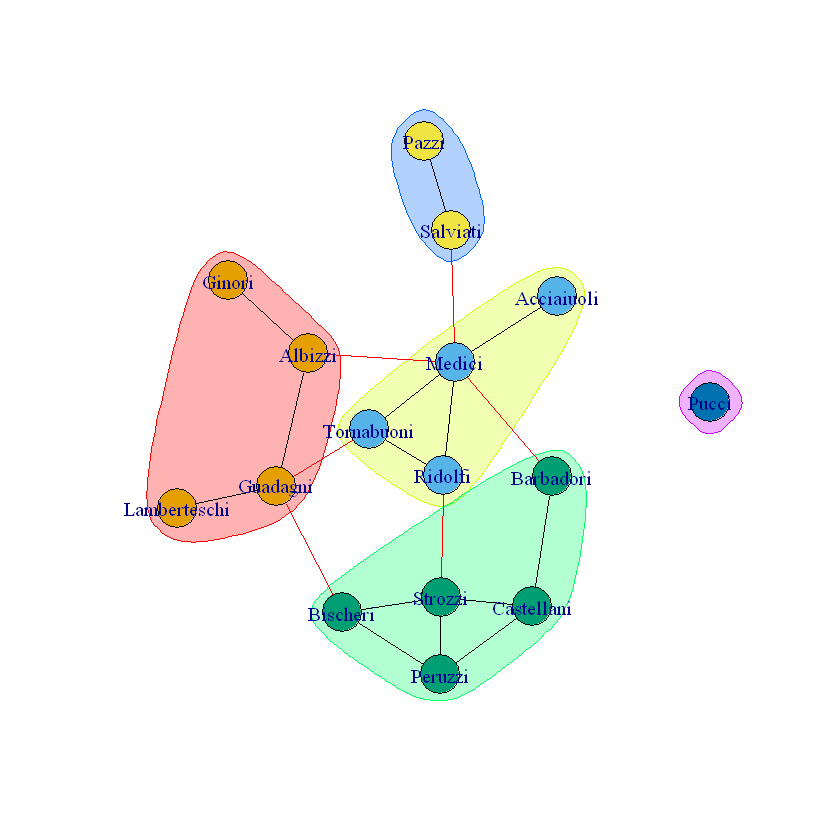

In [109]:
#walktrap
plot(cluster_walktrap(graph), graph, layout = layout_with_fr(graph))

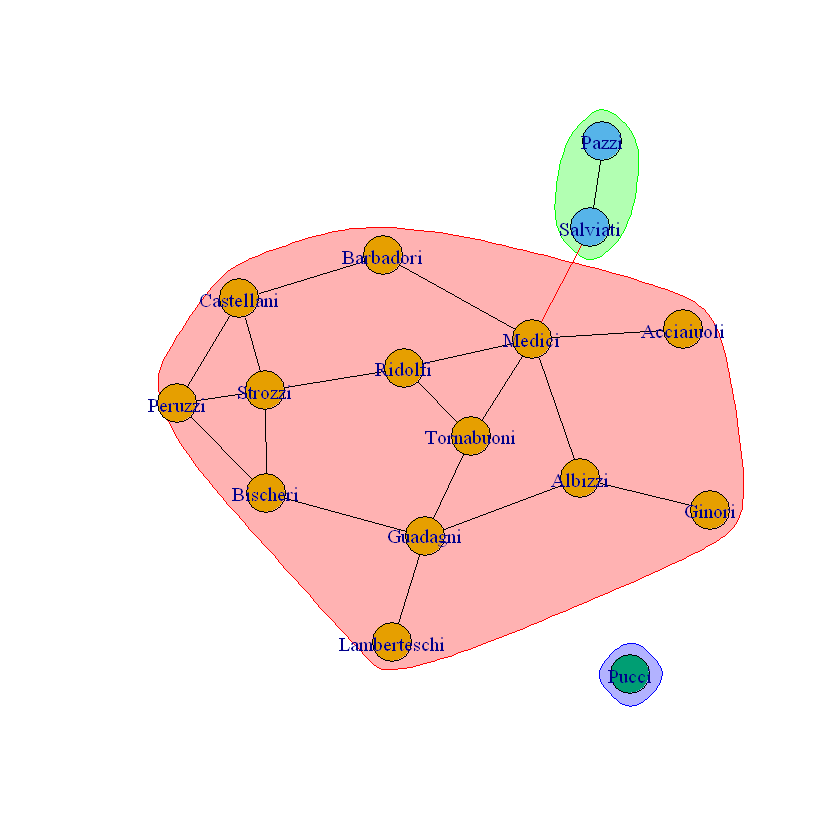

In [110]:
#label propagation
plot(cluster_label_prop(graph), graph, layout = layout_with_fr(graph))

##### 4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.


In [111]:
object <- read.csv("./ceo.csv", comment.char = '#', sep = ',', header=FALSE)
matrix <- as.matrix(object)
matrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


##### 5. Отобразить сеть в виде биграфа

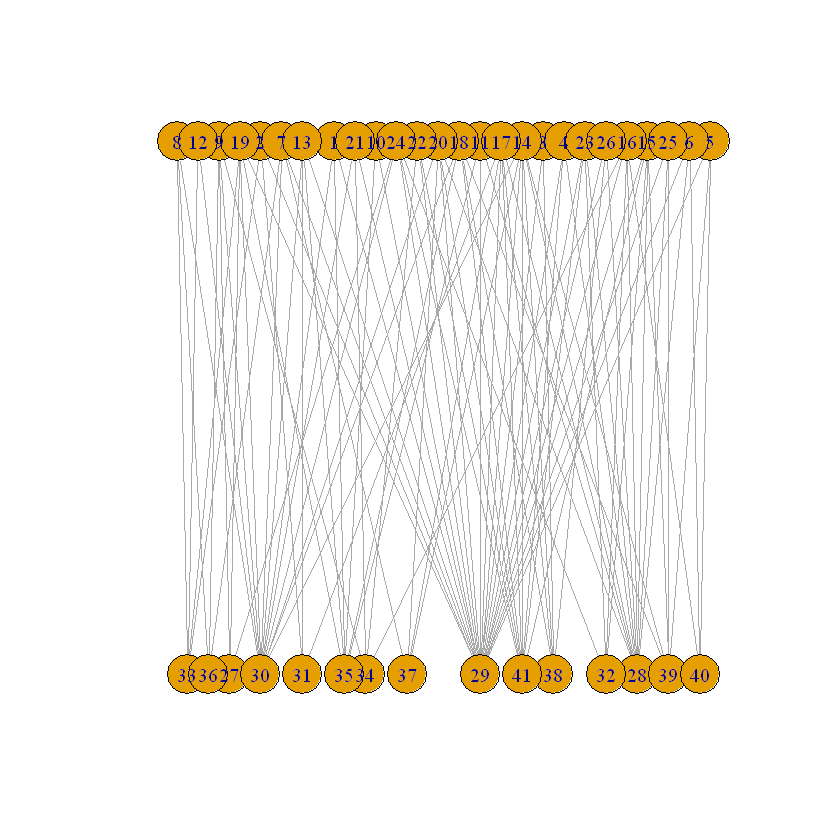

In [112]:
graph <- graph.incidence(matrix, mode = "all")
bipart <- make_bipartite_graph(V(graph)$type, E(graph)$edges)
plot(graph, edge.arrow.size = 0.6, layout=layout_as_bipartite)

##### 6. Отобразить сеть в виде гиперграфа

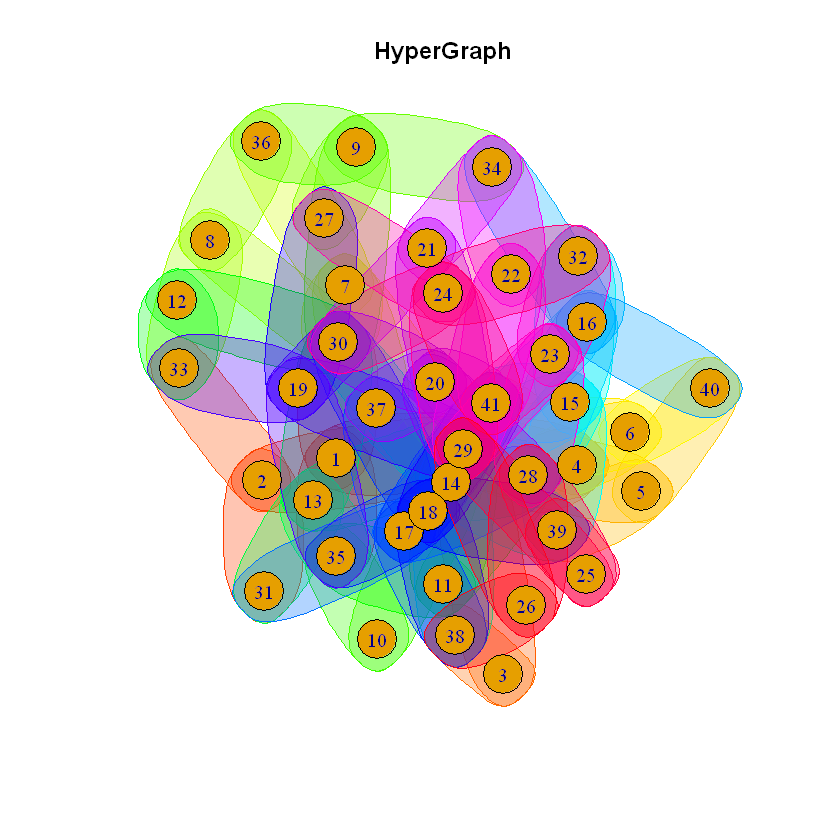

In [113]:
plot(as.hypergraph(graph), main = "HyperGraph")

##### 7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов. Сделать выводы. 


In [114]:
#Сеть соучастия - матрица
compl<-matrix %*% t(matrix)
compl

3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


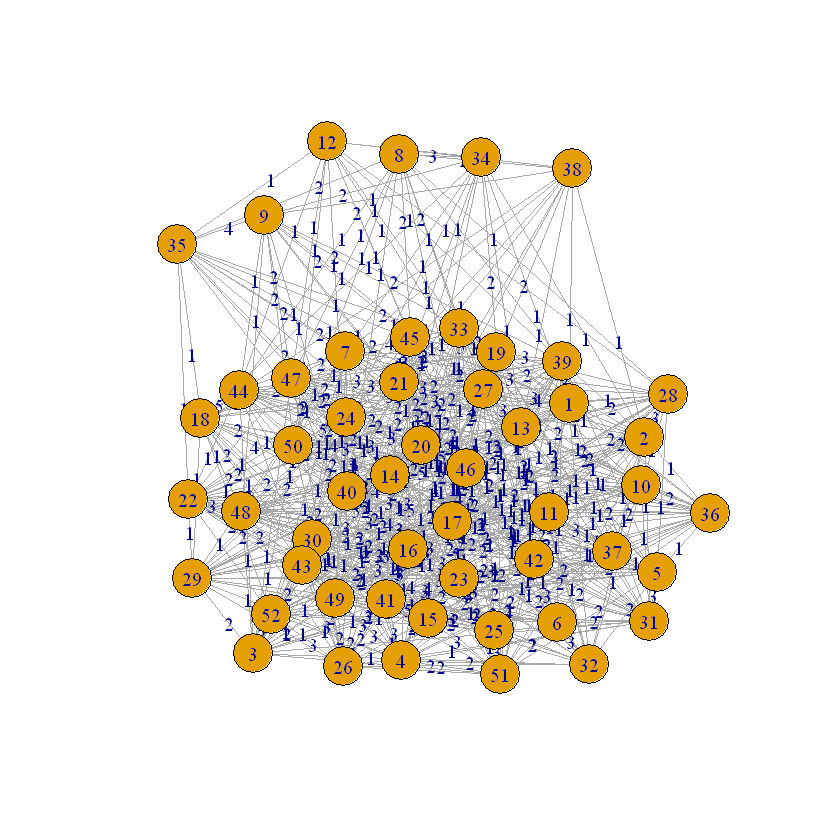

In [115]:
#Сеть соучастия - граф
plot(graph.incidence(compl, weighted = TRUE),  edge.label = E(graph.incidence(compl, weighted = TRUE))$weight)

In [116]:
#Сеть перекрытия событий - матрица
event <- t(matrix) %*% matrix
event


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


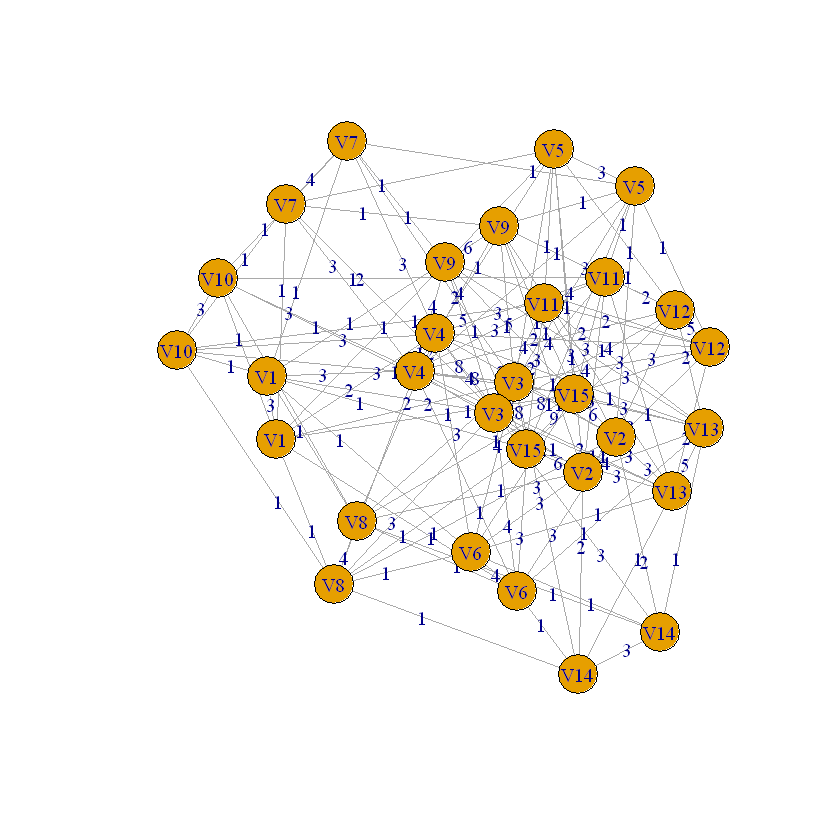

In [117]:
#Сеть перекрытия событий - граф
plot(graph.incidence(event, weighted=TRUE), edge.label = E(graph.incidence(event, weighted=TRUE))$weight)

Вывод:  Все акторы состоят в нескольких группах. Второй и третий группы наиболее популярные.

##### 8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.


In [118]:
#Степень 
degr <-compl[row(compl)==col(compl)]
for(i in 1:length(degr)){
    cat(i, " степень:", degr[i], "\n")
}

1  степень: 3 
2  степень: 3 
3  степень: 2 
4  степень: 3 
5  степень: 3 
6  степень: 3 
7  степень: 4 
8  степень: 3 
9  степень: 4 
10  степень: 2 
11  степень: 3 
12  степень: 2 
13  степень: 4 
14  степень: 7 
15  степень: 5 
16  степень: 5 
17  степень: 6 
18  степень: 5 
19  степень: 5 
20  степень: 5 
21  степень: 3 
22  степень: 3 
23  степень: 4 
24  степень: 5 
25  степень: 3 
26  степень: 3 


In [119]:
#Среднее количество
sum(degr)/length(degr)

[1] 3.769231

Вывод: Актор 14 содержится в наибольшем количестве групп. Наименьшее количество для акторов - 2. В среднем актор принадлежит 3.7 группам

##### 9. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [120]:
#Размер
size<-event[row(event)==col(event)]
for(i in 1:length(size)){
    cat(i, " размер: ", size[i], "\n")
}

1  размер:  3 
2  размер:  11 
3  размер:  22 
4  размер:  12 
5  размер:  3 
6  размер:  4 
7  размер:  4 
8  размер:  4 
9  размер:  6 
10  размер:  3 
11  размер:  4 
12  размер:  5 
13  размер:  5 
14  размер:  3 
15  размер:  9 


In [121]:
#Средний размер
sum(size)/length(size)

[1] 6.533333

Вывод: Наиболее популярная группа - номер 3. Наименее популярные группы содержат по 3 актора.

##### 10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [122]:
#Для соучастия
sum(compl)/(length(degr)*(length(degr)-1))

[1] 1.563077

In [123]:
#Для перекрытия
sum(event)/(length(size)*(length(size)-1))

[1] 1.952381

Вывод: В среднем, каждая пара различных акторов имеет 1.5 общих группы. В среднем, каждая пара различных групп имеет 1.9 общих акторов.

##### 11. Определить диаметр сети аффилированности.


In [124]:
#Диаметр
diameter(graph)

[1] 5

##### 12. Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий. Сделать выводы.


In [125]:
#Отношение соучастия

graphN<-graph_from_adjacency_matrix(matrix %*% t(matrix), mode = "undirected", weighted = TRUE)
graphM<-graph_from_adjacency_matrix(t(matrix) %*% matrix, mode = "undirected", weighted = TRUE)

cat("Уровня 3:\n")
graphWithoutLightEdges <- delete.edges(graphN, E(graphN)[E(graphN)$weight < 3])
max_cliques(graphWithoutLightEdges, min=3) 

cat("Уровня 4:\n")
graphWithoutLightEdges <- delete.edges(graphN, E(graphN)[E(graphN)$weight < 4])
max_cliques(graphWithoutLightEdges, min=3) 



Уровня 3:


[[1]]
+ 3/26 vertices, from 2afaa3f:
[1]  1 13 19

[[2]]
+ 3/26 vertices, from 2afaa3f:
[1]  7 14 20

[[3]]
+ 3/26 vertices, from 2afaa3f:
[1] 16 15 23

[[4]]
+ 3/26 vertices, from 2afaa3f:
[1] 25 14 15

[[5]]
+ 3/26 vertices, from 2afaa3f:
[1] 26 14 17

[[6]]
+ 5/26 vertices, from 2afaa3f:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, from 2afaa3f:
[1] 14  4 23 20 17 15


Уровня 4:


[[1]]
+ 3/26 vertices, from 2afc6cf:
[1] 20 14 17


In [126]:
#Отношение перекрытия событий

cat("Уровня 2:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 2])
max_cliques(graphWithoutLightEdges, min=3) 

cat("Уровня 3:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 3])
max_cliques(graphWithoutLightEdges, min=3)

cat("Уровня 4:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 4])
max_cliques(graphWithoutLightEdges, min=3)

cat("Уровня 5:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 5])
max_cliques(graphWithoutLightEdges, min=3)

cat("Уровня 6:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 6])
max_cliques(graphWithoutLightEdges, min=3)

Уровня 2:


[[1]]
+ 3/15 vertices, named, from 2b3fd47:
[1] V1 V3 V4

[[2]]
+ 3/15 vertices, named, from 2b3fd47:
[1] V7 V3 V4

[[3]]
+ 3/15 vertices, named, from 2b3fd47:
[1] V8 V3 V4

[[4]]
+ 3/15 vertices, named, from 2b3fd47:
[1] V9 V3 V4

[[5]]
+ 3/15 vertices, named, from 2b3fd47:
[1] V14 V2  V3 

[[6]]
+ 4/15 vertices, named, from 2b3fd47:
[1] V6  V2  V15 V3 

[[7]]
+ 6/15 vertices, named, from 2b3fd47:
[1] V15 V2  V12 V4  V3  V11

[[8]]
+ 6/15 vertices, named, from 2b3fd47:
[1] V15 V2  V12 V4  V3  V13


Уровня 3:


[[1]]
+ 3/15 vertices, named, from 2b4208d:
[1] V9 V3 V4

[[2]]
+ 4/15 vertices, named, from 2b4208d:
[1] V13 V2  V15 V3 

[[3]]
+ 4/15 vertices, named, from 2b4208d:
[1] V15 V3  V2  V6 

[[4]]
+ 4/15 vertices, named, from 2b4208d:
[1] V15 V3  V2  V11

[[5]]
+ 4/15 vertices, named, from 2b4208d:
[1] V15 V3  V2  V12

[[6]]
+ 4/15 vertices, named, from 2b4208d:
[1] V15 V3  V4  V11


Уровня 4:


[[1]]
+ 3/15 vertices, named, from 2b442e1:
[1] V15 V3  V2 

[[2]]
+ 3/15 vertices, named, from 2b442e1:
[1] V15 V3  V4 

[[3]]
+ 3/15 vertices, named, from 2b442e1:
[1] V4 V3 V9


Уровня 5:


[[1]]
+ 3/15 vertices, named, from 2b474b7:
[1] V2  V3  V15


Уровня 6:


[[1]]
+ 3/15 vertices, named, from 2b48f2b:
[1] V2  V3  V15


Вывод: Имеется 7 групп акторов, которые состоят не менее 3-х общих групп, наибольшая из этих групп состоит из 6 акторов.

##### 13. Для каждых пар событий определить отношение шансов. Сделать выводы.

In [127]:
count = 0
for(k in 1:(length(size)-1)){
    for(l in (k+1):length(size)){
        a <- matrix[, c(k, l)]
        res <- sum(colSums(t(a) == c(1, 1)) == ncol(a))*
        sum(colSums(t(a) == c(0, 0)) == ncol(a))/
        sum(colSums(t(a) == c(0, 1)) == ncol(a))/
        sum(colSums(t(a) == c(1, 0)) == ncol(a))   
        cat( k, ' : ', l, ' = ', res, '   ///  ', sep="")
        count <- count +1
        if(count > 3){
            count = 0
            cat('\n')
        }
    }
}

1 : 2 = 0   ///  1 : 3 = 0.3   ///  1 : 4 = Inf   ///  1 : 5 = 0   ///  
1 : 6 = 3.333333   ///  1 : 7 = 3.333333   ///  1 : 8 = 3.333333   ///  1 : 9 = 1.8   ///  
1 : 10 = 5.25   ///  1 : 11 = 0   ///  1 : 12 = 0   ///  1 : 13 = 0   ///  
1 : 14 = 0   ///  1 : 15 = 0.9375   ///  2 : 3 = Inf   ///  2 : 4 = 0.1111111   ///  
2 : 5 = 0.65   ///  2 : 6 = 5.25   ///  2 : 7 = 0   ///  2 : 8 = 0.4   ///  
2 : 9 = 0.2   ///  2 : 10 = 0   ///  2 : 11 = 5.25   ///  2 : 12 = 2.4375   ///  
2 : 13 = 2.4375   ///  2 : 14 = 3.111111   ///  2 : 15 = 4.8   ///  3 : 4 = 0   ///  
3 : 5 = Inf   ///  3 : 6 = Inf   ///  3 : 7 = 0.1   ///  3 : 8 = 0.4736842   ///  
3 : 9 = 0.8823529   ///  3 : 10 = 0.04761905   ///  3 : 11 = Inf   ///  3 : 12 = 0.6666667   ///  
3 : 13 = 0.6666667   ///  3 : 14 = Inf   ///  3 : 15 = 1.714286   ///  4 : 5 = 0.5454545   ///  
4 : 6 = 0.3333333   ///  4 : 7 = 4.333333   ///  4 : 8 = 1.2   ///  4 : 9 = 3   ///  
4 : 10 = Inf   ///  4 : 11 = 4.333333   ///  4 : 12 = 0.7333333

Вывод: Большинство пар групп имеют хотя бы одного общего актора.

## Выводы


В ходе лабораторной  работы получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.